# Prediksi Penumpang Pesawat - Menggunakan pycaret

Permasalahan pada project ini yaitu pada dataset hanya terdapat data penumpang sampai tahun 1960 saja. Tujuan dari project ini yaitu membuat prediksi data penumpang setelah tahun 1960.

**Pycaret**

PyCaret adalah paket pembelajaran mesin sumber terbuka yang ditulis dalam kode rendah yang memungkinkan data scientist mengotomatiskan proses pembelajaran mesin mereka. Ini mengurangi proses eksperimen model, memungkinkan pencapaian hasil tertentu dengan lebih sedikit kode.

**Kenapa menggunakan pycaret**

Karena semakin banyak bisnis yang mengalihkan fokus mereka ke Pembelajaran Mesin untuk mengatasi masalah yang menantang, ilmuwan data diharapkan memberikan hasil lebih cepat. Ini telah meningkatkan permintaan untuk mengotomatisasi fase penting dalam proyek ilmu data sehingga ilmuwan data dapat fokus pada masalah sebenarnya yang dihadapi daripada menulis ratusan baris kode untuk mengidentifikasi model yang optimal.

# Import Library

In [67]:
import collections.abc
#hyper needs the four following aliases to be done manually.
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping
#Now import hyper
import hyper

In [63]:
from collections.abc import Iterable

In [68]:
# --- Importing Libraries ---
import datetime
import numpy as np
import pandas as pd
import warnings
import pycaret
import kaleido
import plotly.express as px

from pycaret.time_series import *
from pycaret.utils import enable_colab

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
enable_colab()

# Read Dataset

In [136]:
df = pd.read_csv('D:/TUGAS KULIAH/DATASET BELAJAR DATA SCIENCE/Airpassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [89]:
# --- Print Dataset Info ---
print('\033[94m\033[1m'+'.: Imported Dataset Info :.'+'\033[0m')
print('\033[94m*' * 30+'\033[0m')
print('Total Rows:'+'\033[94m\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[94m\033[1m', df.shape[1])
print('\033[0m\033[94m'+'*' * 30+'\033[0m')
print('\n')

# --- Print Dataset Detail ---
print('\033[94m\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('\033[0m\033[94m'+'*' * 30+'\033[0m')
df.info(memory_usage = False)

.: Imported Dataset Info :.
******************************
Total Rows: 144
Total Columns: 2
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)

In [90]:
df.describe().T.style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
#Passengers,144.000000,280.298611,119.966317,104.000000,180.000000,265.500000,360.500000,622.000000


In [81]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [82]:
df.shape

(144, 2)

In [83]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [137]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [92]:
# --- Set `Month` Column as Index ---
df.set_index('Month', inplace=True, drop=True)
df.head(3).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

#Passengers
112
118
132


# Pycaret Setup

- Bagian ini akan mengimplementasikan PyCaret dengan memanggil fungsi TimeSeriesExperiment().
- Untuk tujuan eksperimen, jumlah lipatan yang digunakan dalam validasi silang akan ditetapkan menjadi 3 dan perkiraan yang digunakan akan ditetapkan menjadi 12 (12 poin terakhir dalam kumpulan data akan ditetapkan sebagai pengujian).

In [94]:
s = setup(df, fh=12, fold=3, session_id=123)

,Description,Value
0,session_id,123
1,Target,#Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Seperti yang dapat dilihat dari penyiapan, PyCaret mengidentifikasi bahwa pembedaan (d) dan pembedaan musiman (D) diperlukan untuk data deret waktu ini.

# Exploratory Data Analysis

In [95]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


Dari hasil uji statistik di atas, dapat disimpulkan bahwa:

- timeseries tidak stasioner (nilai p ADF lebih dari 0,05)
- timeseries tidak memadai (nilai p Ljung-Box kurang dari 0,05)

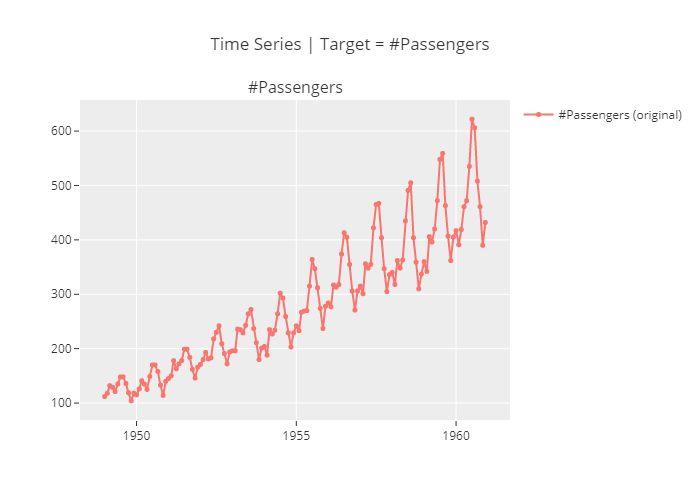

In [99]:
# --- Time Series Plot ---
plot_model(plot = 'ts', fig_kwargs = {'hoverinfo': 'none', 'big_data_threshold': 15})

- Dilihat dari plot time series di atas menunjukkan tren kenaikan dari Januari 1949 sampai Desember 1960. Selanjutnya, variasi musim juga dapat dilihat dari gambar (puncak musiman pada bulan Juli).
- Dapat disimpulkan bahwa terdapat variabilitas musiman multiplikatif dengan tren aditif.
- Grafik berikutnya akan menunjukkan train dan test plot.

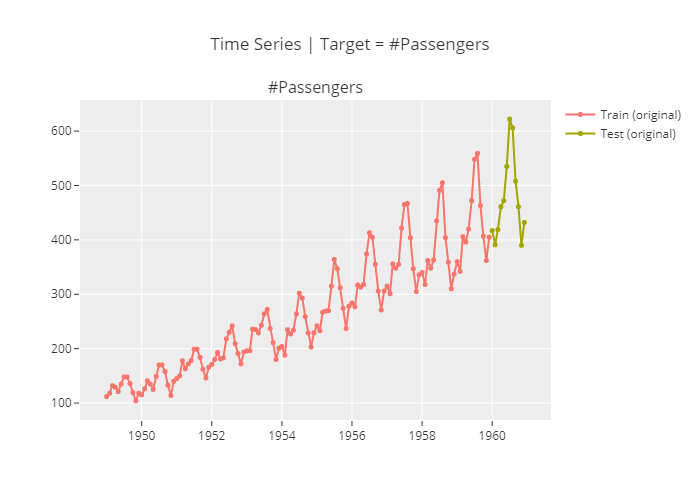

In [100]:
#--- Train & Test Plot ---
plot_model(plot = 'train_test_split', fig_kwargs = {'hoverinfo': 'none', 'big_data_threshold': 15})

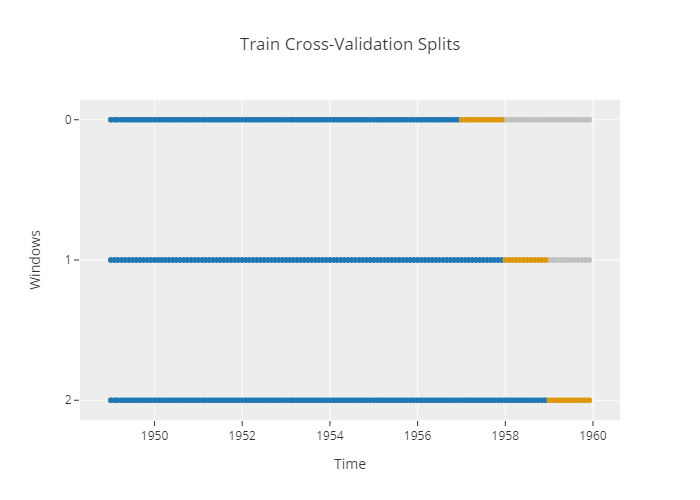

In [101]:
# --- CV Plot ---
plot_model(plot = 'cv', fig_kwargs = {'hoverinfo': 'none', 'big_data_threshold': 15})

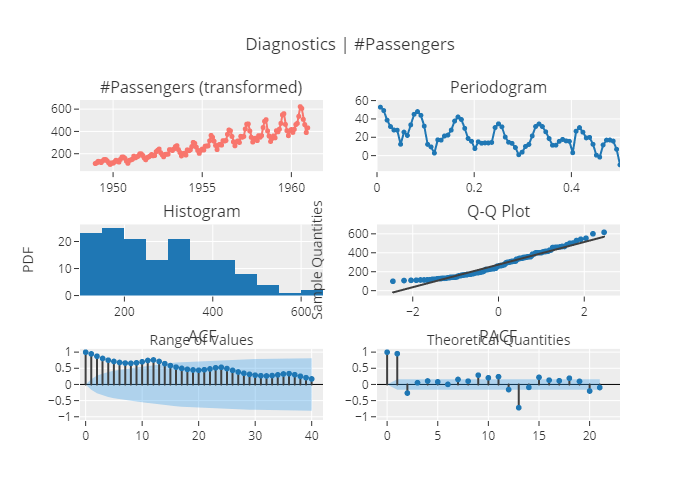

In [102]:
# --- Diagnostic Plot ---
plot_model(plot = 'diagnostics', fig_kwargs = {'hoverinfo': 'none', 'big_data_threshold': 15})

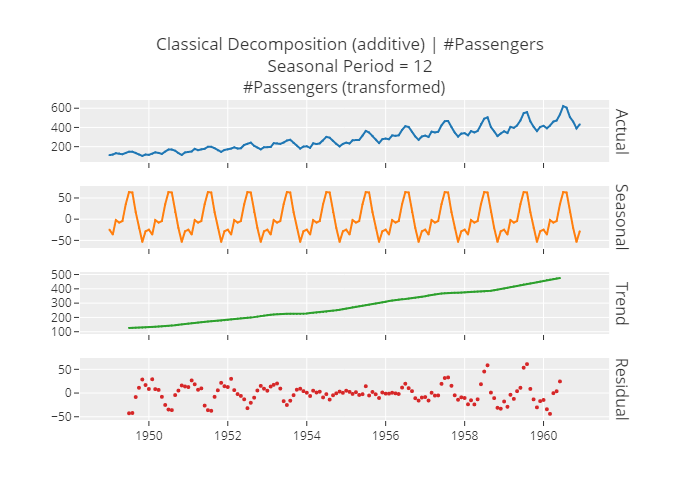

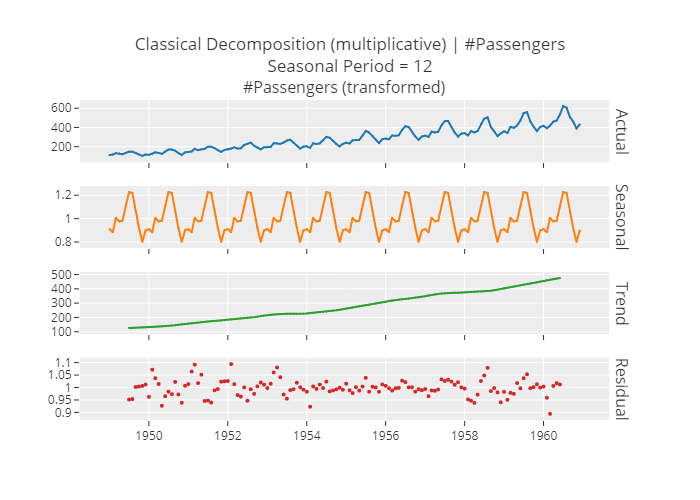

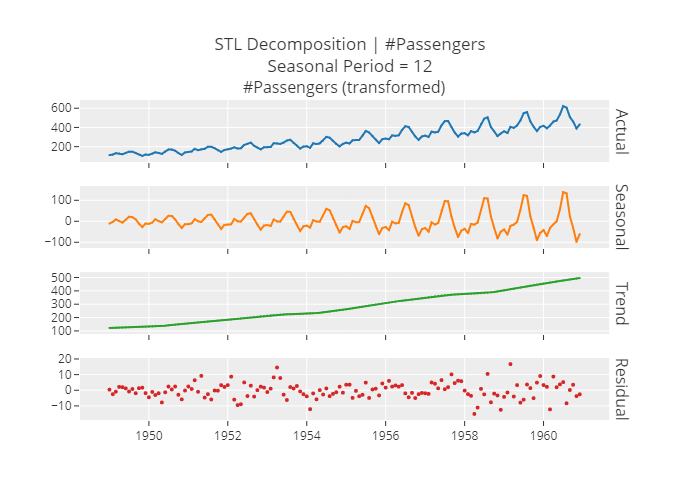

In [103]:
# --- Showing Decomposition Plots ---
plot_model(plot = 'decomp', fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})
plot_model(plot = 'decomp', data_kwargs={'type': 'multiplicative'}, 
           fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})
plot_model(plot = 'decomp_stl', fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})

- Seperti yang disebutkan sebelumnya, ada tren dan musiman yang meningkat dalam seri berdasarkan hasil dekomposisi.
- Residu dalam dekomposisi klasik juga menarik, menunjukkan periode variabilitas tinggi pada tahun-tahun awal dan akhir deret tersebut.

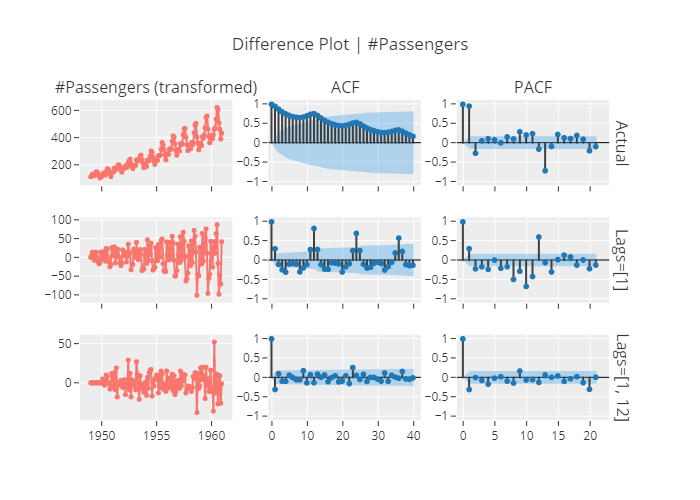

In [104]:
# --- Before After Differencing ---
plot_model(plot = 'diff', data_kwargs={'lags_list': [[1], [1, 12]], 'acf': True, 'pacf': True}, 
           fig_kwargs = {'hoverinfo': 'none','big_data_threshold':15})

Dapat dilihat bahwa first differencing dengan season differential memiliki hasil yang lebih baik.

# Time Series Models

In [105]:
#timeseries models
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


# Membandingkan Models

In [107]:
#perbandingan models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.5716,0.5997,16.7772,19.7958,0.0422,0.0427,0.8954,0.2000
ets,ETS,0.5932,0.6213,17.4201,20.5135,0.0440,0.0445,0.8882,0.2567
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6602,0.7287,19.4657,24.1007,0.0484,0.0484,0.8460,0.2600
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6813,0.7866,20.0334,25.9670,0.0491,0.0499,0.8113,0.0900
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7004,0.7703,20.6086,25.4405,0.0509,0.0514,0.8215,0.0767
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7004,0.7702,20.6084,25.4401,0.0509,0.0514,0.8215,0.0733
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.7004,0.7702,20.6084,25.4401,0.0509,0.0514,0.8215,0.0767
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7029,0.7732,20.6816,25.5362,0.0511,0.0516,0.8201,0.0800
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7048,0.7751,20.7373,25.6005,0.0512,0.0517,0.8193,0.0667
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.7106,0.8146,20.9112,26.8907,0.0505,0.0509,0.8085,6.2333


Processing:   0%|          | 0/125 [00:00<?, ?it/s]

Berdasarkan hasil perbandingan evaluasi model diatas dapat dilihat bahwa model Exponential Smoothing lebih baik dan memiliki R2 Score paling tinggi dibandingkan dengan model lainnya.

# Exponential Smoothing Forecast

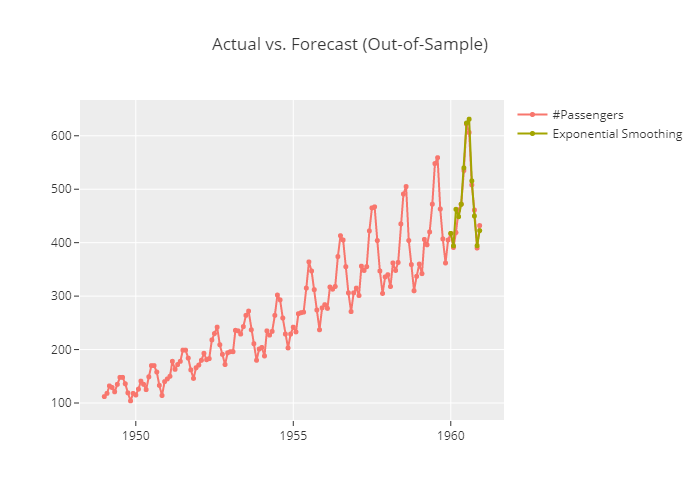

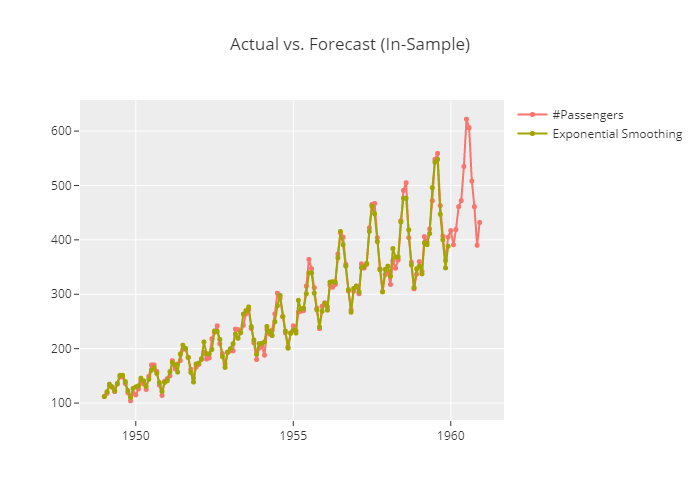

In [108]:
# --- Plot Forecasting Performance & Insample ---
plot_model(best, plot = 'forecast', fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})
plot_model(best, plot = 'insample', fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})

Terlihat bahwa kinerja model eksponensial smoothing menghasilkan kinerja yang baik. Bagian selanjutnya akan menampilkan plot ramalan untuk 60 titik total penumpang berikutnya dan nilainya dengan model pemulusan eksponensial.

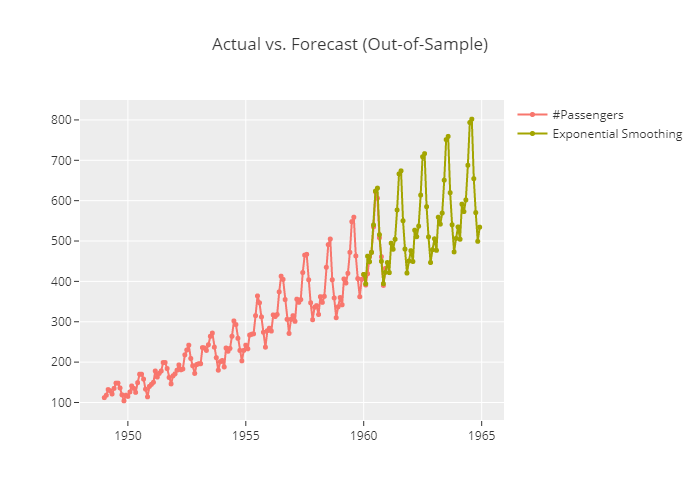

In [109]:
# --- Forecast Plot 60 points ---
plot_model(best, plot = 'forecast', data_kwargs = {'fh': 60}, 
           fig_kwargs = {'hoverinfo': 'none', 'big_data_threshold': 15})

In [111]:
#peramalan pada 60 waktu kedepan
predict_model(best, fh=np.arange(13,61))

,y_pred
1961-01,446.6855
1961-02,421.6636
1961-03,494.6476
1961-04,479.6568
1961-05,504.3529
1961-06,576.8470
1961-07,666.2788
1961-08,673.8666
1961-09,550.2760
1961-10,480.0087


- Nilai prakiraan menunjukkan prediksi jumlah penumpang setelah Desember 1960.
- Bagian selanjutnya akan menunjukkan plot diagnostik exponential smoothing.

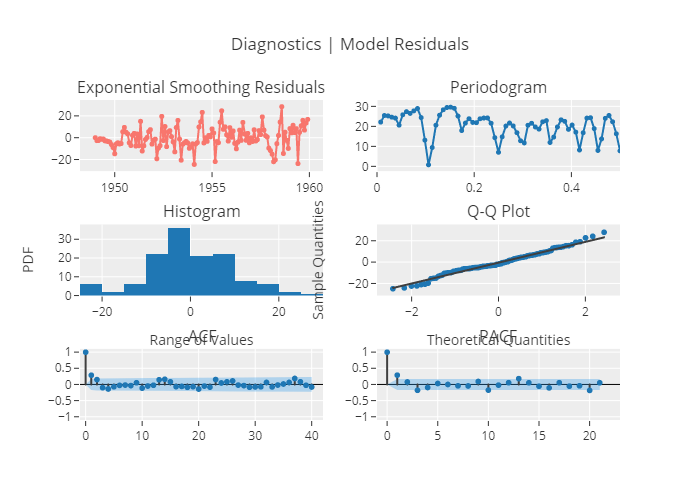

In [112]:
# --- Diagnostic Plot ---
plot_model(best, plot = 'diagnostics', fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})

Dengan exponential smoothing, dapat dilihat bahwa:

- Histogram terdistribusi normal,
- Pada plot ACF terdapat 2 lonjakan signifikan (lag), dan Cut-off setelah lag 1 di plot PACF.

**Exponential Smoothing Tuning**

In [113]:
#tuned exponential smoothing
exp_tune = tune_model(best)
print(best)
print(exp_tune)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3617,0.4124,10.5620,13.4978,0.0272,0.0273,0.9407
1,1957-12,0.8588,0.8856,26.2573,30.0652,0.0738,0.0704,0.7632
2,1958-12,0.3942,0.4126,11.2644,13.4112,0.0261,0.0265,0.9598
Mean,nan,0.5382,0.5702,16.0279,18.9914,0.0424,0.0414,0.8879
SD,nan,0.2271,0.2230,7.2390,7.8304,0.0222,0.0205,0.0885


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
ExponentialSmoothing(seasonal='mul', sp=12, trend='add')
ExponentialSmoothing(seasonal='add', sp=12, trend='additive', use_boxcox=True)


- Tuned exponential smoothing memiliki skor RMSE, MAE, MASE, dan MAPE yang lebih rendah dibandingkan dengan exponential smoothing yang tidak tuned.
- Juga dapat dilihat penyetelan hyperparameter sebelum dan sesudah tuned exponential smoothing .
- Selanjutnya akan ditampilkan kinerja Tuned exponential smoothing dalam plot deret waktu.

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,0.5858,0.6575,17.8363,22.7139,0.0375,0.0364,0.9069


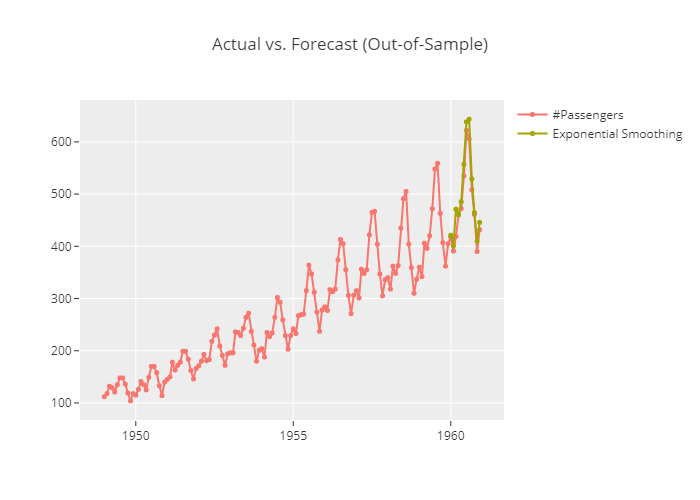

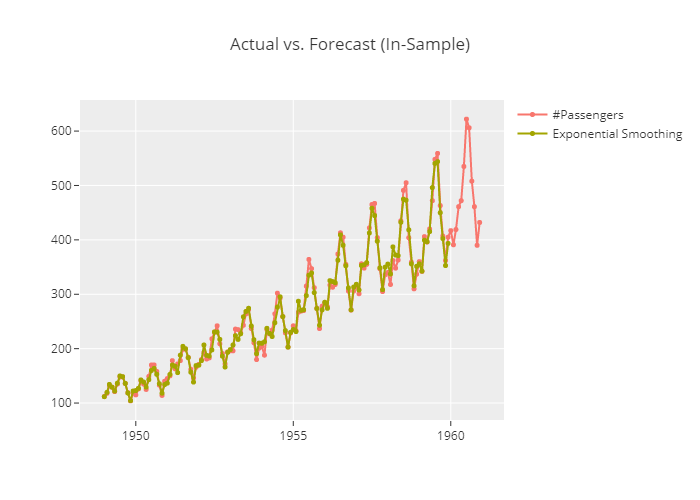

In [116]:
# --- Tuned Exponential Smoothing Performance ---
predict_es = predict_model(exp_tune)
plot_model(estimator = exp_tune, fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})
plot_model(exp_tune, plot = 'insample', fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})

- Seperti yang bisa dilihat, kinerjanya sedikit lebih baik dibandingkan dengan yang sebelumnya.
- Menggunakan tuned exponential smoothing untuk memperkirakan 60 waktu berikutnya (setelah Desember 1960) penumpang masa depan.

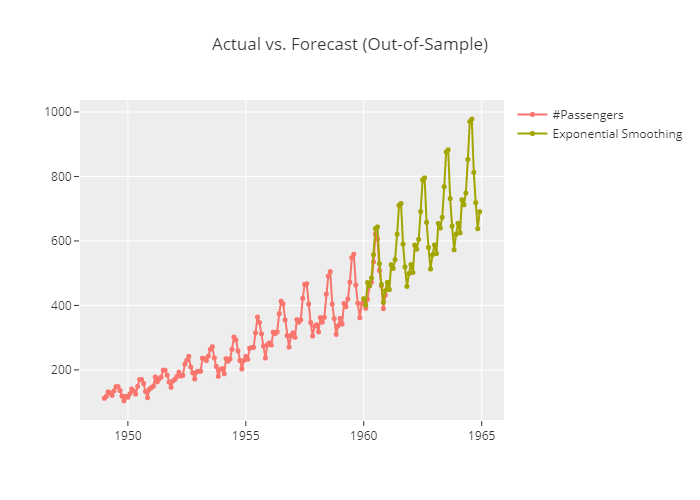

In [118]:
# --- Forecast Next 60 Points using Tuned Exponential Smoothing ---
plot_model(exp_tune, plot = 'forecast', data_kwargs = {'fh': 60}, 
           fig_kwargs = {'hoverinfo': 'none', 'big_data_threshold': 15})

In [119]:
# --- Plot Next 60 Points using Tuned Exponential Smoothing ---
predict_model(exp_tune, fh = np.arange(13, 61))

,y_pred
1961-01,471.3226
1961-02,449.1764
1961-03,526.3262
1961-04,514.6955
1961-05,542.0166
1961-06,620.8155
1961-07,710.2995
1961-08,716.0169
1961-09,590.3038
1961-10,519.4294


- Nilai prakiraan menunjukkan prediksi jumlah penumpang setelah Desember 1960.
- Bagian selanjutnya akan menunjukkan plot diagnostik exponential smoothing.

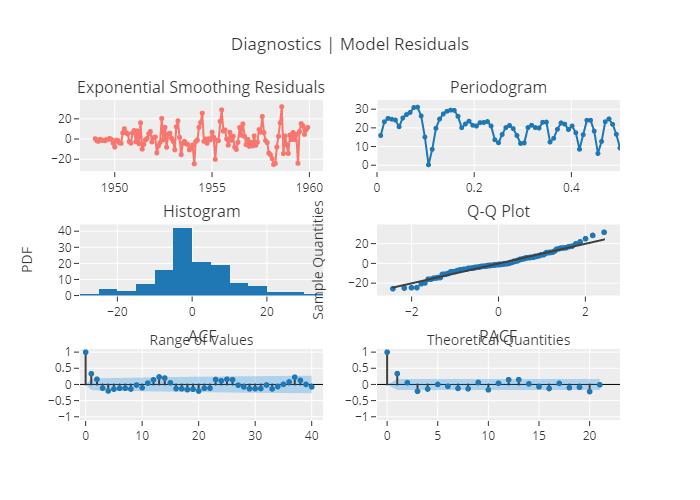

In [121]:
# --- Plot Diagnostic Plot - Tuned Exponential Smoothing ---
plot_model(exp_tune, plot = 'diagnostics', fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})

Tidak jauh berbeda antara plot diagnostik tuned exponential smoothing dan normal.

# ARIMA Forecast

In [127]:
# --- Create ARIMA Model ---
arima_model = create_model('auto_arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.4136,0.4827,12.0769,15.8014,0.0298,0.0305,0.9187
1,1957-12,0.6349,0.6333,19.4102,21.4989,0.0538,0.0520,0.8789
2,1958-12,1.1060,1.0182,31.6020,33.0981,0.0738,0.0769,0.7549
Mean,nan,0.7181,0.7114,21.0297,23.4661,0.0525,0.0531,0.8509
SD,nan,0.2887,0.2255,8.0529,7.1970,0.0180,0.0190,0.0698


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [128]:
# --- Predicting using ARIMA Model ---
predict_arima = predict_model(arima_model)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Auto ARIMA,0.4893,0.5365,14.8982,18.5365,0.0310,0.0309,0.9380


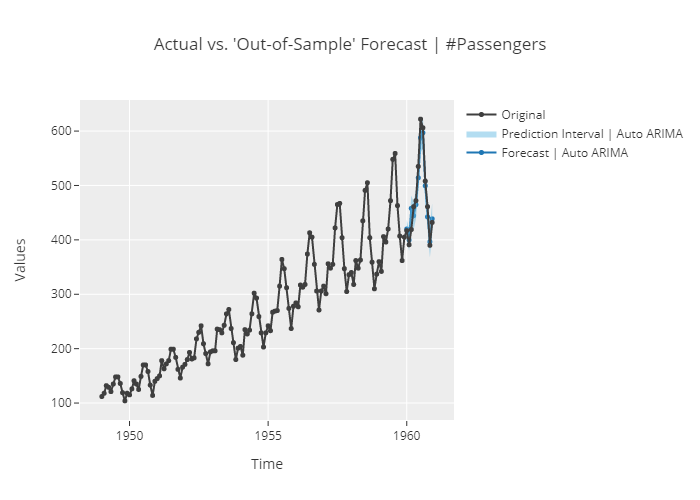

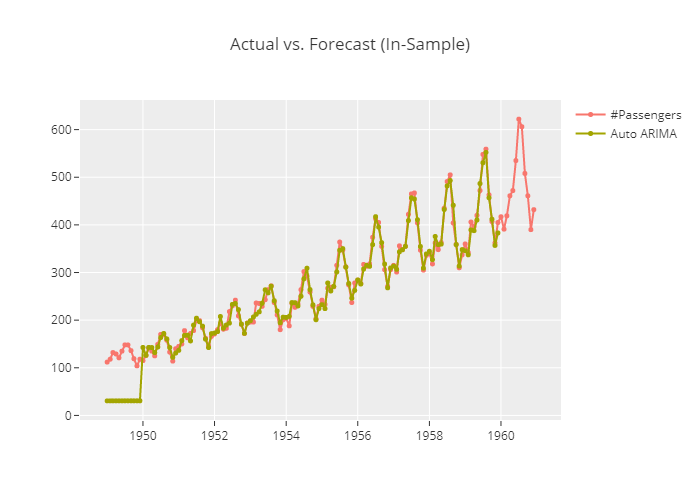

In [129]:
# --- Performance & In-sample Plot ARIMA Model ---
plot_model(estimator = arima_model, fig_kwargs = {'hoverinfo': 'none', 'big_data_threshold': 15})
plot_model(arima_model, plot = 'insample', fig_kwargs = {'hoverinfo': 'none', 'big_data_threshold': 15})

Terlihat bahwa performansi model ARIMA sudah baik. Sekarang, bagian selanjutnya akan menampilkan plot perkiraan dan nilai penumpang masa depan dengan interval prediksi 95%.

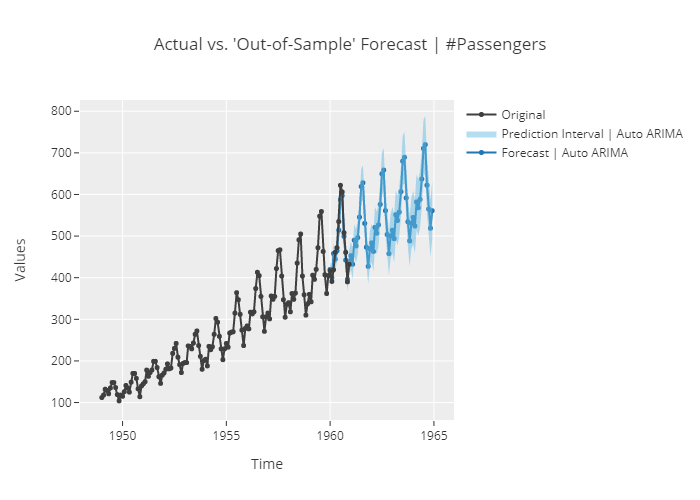

,y_pred,lower,upper
1961-01,453.0077,419.0118,487.0036
1961-02,432.4005,396.0793,468.7217
1961-03,490.1513,451.4433,528.8593
1961-04,476.3150,436.2983,516.3317
1961-05,496.3762,455.4107,537.3417
1961-06,545.5087,503.9708,587.0465
1961-07,619.0237,577.1042,660.9433
1961-08,628.0990,585.9396,670.2583
1961-09,530.5139,488.1983,572.8294
1961-10,473.2576,430.8423,515.6728


In [130]:
# --- ARIMA Model Performance Plot ---
plot_model(arima_model, plot = 'forecast', data_kwargs = {'fh': 60}, 
           fig_kwargs = {'hoverinfo': 'none', 'big_data_threshold': 15})
predict_model(arima_model, return_pred_int = True, fh = np.arange(13, 61))

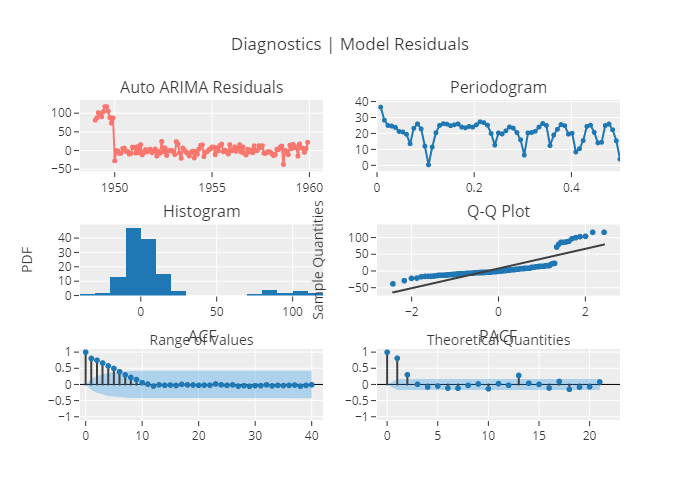

In [131]:
# --- Diagnostic Plot ARIMA ---
plot_model(arima_model, plot = 'diagnostics', fig_kwargs = {'hoverinfo': 'none','big_data_threshold': 15})

Dari plot diagnostik, dapat diketahui bahwa:
- Histogram tidak terdistribusi normal,
- Plot ACF hampir tidak terlihat secara eksponensial, dan
- Terdapat 3 spike/lag yang signifikan pada plot PACF.

# Saving Model

In [133]:
# --- Save Model in Pickle File ---
save_model(best, 'exp_smooth_final_model')

Transformation Pipeline and Model Successfully Saved


(ExponentialSmoothing(seasonal='mul', sp=12, trend='add'),
 'exp_smooth_final_model.pkl')

# Load Model

In [134]:
# --- Load Pickle File ---
load_model = load_model('exp_smooth_final_model')

Transformation Pipeline and Model Successfully Loaded
